In [2]:
import os
import shutil

import cv2
import random
import numpy as np

import albumentations as A

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go



from collections import Counter

# Step 1: Loading Test Dataset

In [3]:
def Load_Dataset(base_path="lfw-deepfunneled-test", image_size=(160, 160)):
    images = []
    labels = []
    target_names = []
    label_map = {}
    
    # Loop through each person's folder
    for person_name in os.listdir(base_path):
        person_dir = os.path.join(base_path, person_name)
        if os.path.isdir(person_dir):
            if person_name not in label_map:
                label_map[person_name] = len(label_map)
                target_names.append(person_name)
            for image_file in os.listdir(person_dir):
                image_path = os.path.join(person_dir, image_file)
                img = cv2.imread(image_path)
                if img is not None:
                    # Resize to a uniform size (e.g., 160x160 for FaceNet)
                    img = cv2.resize(img, image_size)
                    images.append(img)
                    labels.append(label_map[person_name])
                    
                    
    # Print Dataset Overview
    print("Number of people:", len(target_names))
    print("Number of images:", len(images))
    print("Number of labels:", len(labels))
    print("Image shape:", images[0].shape)  
    
    return np.array(images), np.array(labels), target_names

# Load the dataset
images, labels, target_names = Load_Dataset()


Number of people: 5317
Number of images: 12179
Number of labels: 12179
Image shape: (160, 160, 3)


# Step 2: Overview of Dataset

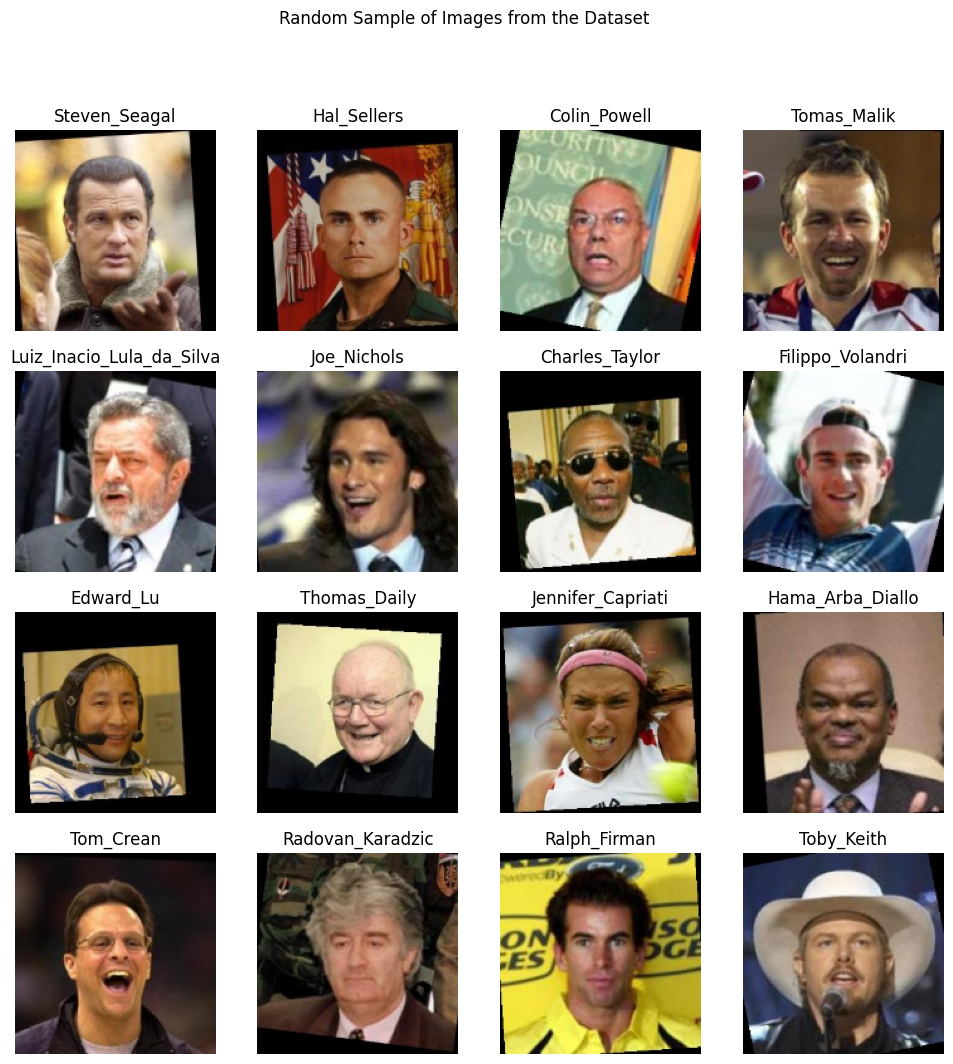

In [4]:
num_samples = 16  # Number of samples to display
sample_indices = random.sample(range(len(images)), num_samples)

plt.figure(figsize=(12, 12))
for i, idx in enumerate(sample_indices):
    plt.subplot(4, 4, i + 1)
    # Convert image from BGR to RGB for proper display in matplotlib
    plt.imshow(cv2.cvtColor(images[idx], cv2.COLOR_BGR2RGB))
    plt.title(target_names[labels[idx]])
    plt.axis("off")
plt.suptitle("Random Sample of Images from the Dataset")
plt.show()


# Step 3: EDA - Image Analysis

## Step 3)i): EDA - Class Distribution Analysis

In [5]:
# Count images per label
label_counts = Counter(labels)

# Build a mapping from class name to image count
class_counts = {target_names[i]: label_counts[i] for i in range(len(target_names))}

# Select 20 random classes (or fewer if not enough classes)
selected_keys = random.sample(list(class_counts.keys()), k=min(20, len(class_counts)))
selected_counts = [class_counts[key] for key in selected_keys]

# Create a horizontal bar plot using Plotly
fig = px.bar(
    x=selected_counts,
    y=selected_keys,
    orientation='h',
    labels={'x': 'Number of Images', 'y': 'Person'},
    title='Distribution of Images per Person (20 Random Classes)'
)
fig.show()


In [6]:
# Count images per label
label_counts = Counter(labels)

# Build a mapping from class name to image count
class_counts = {target_names[i]: label_counts[i] for i in range(len(target_names))}

# Select random classes 
selected_keys = random.sample(list(class_counts.keys()), k=min(20, len(class_counts)))
selected_counts = [class_counts[key] for key in selected_keys]

# Create a bubble plot 
fig = px.scatter(
    x=selected_keys,
    y=selected_counts,
    size=selected_counts,
    color=selected_counts,  
    color_continuous_scale='Viridis',  
    labels={'x': 'Person', 'y': 'Number of Images'},
    title='Bubble Plot of Images per Person (20 Random Classes) with Color Scheme'
)

# The 'sizeref' parameter scales the bubble sizes appropriately.
fig.update_traces(mode='markers', marker=dict(
    sizemode='area',
    sizeref=2.*max(selected_counts)/(40.**2),
    line_width=2
))

fig.show()


## Step 3)ii): EDA - Image Dimension and Format Verification

- Verify that all images have been resized uniformly

In [7]:
# Check the unique shapes of all images
unique_shapes = {img.shape for img in images}
print("Unique image shapes in the dataset:", unique_shapes)

# You should expect each image to have the shape (160, 160, 3).


Unique image shapes in the dataset: {(160, 160, 3)}


## Step 3)iii): EDA - Show unique counts of images across all subfolders



In [8]:
def print_unique_image_counts_and_folder_counts(base_path, allowed_extensions=('.jpg', '.jpeg', '.png')):
    """
    Prints the unique number of images found in each subfolder of the given base path,
    and how many subfolders correspond to each unique image count.

    :param base_path: str - Path to the directory containing subfolders of images.
    :param allowed_extensions: tuple - File extensions to consider as images.
    """
    # Ensure the base_path is valid
    if not os.path.isdir(base_path):
        print(f"Error: The path '{base_path}' is not a valid directory.")
        return

    # Get a list of all subdirectories in base_path
    subfolders = [f.path for f in os.scandir(base_path) if f.is_dir()]

    # Dictionary to store { image_count: number_of_subfolders_with_this_count }
    count_dict = {}

    # Iterate over each subfolder
    for folder in subfolders:
        # List all files in the subfolder and filter by allowed extensions
        image_files = [
            file_name for file_name in os.listdir(folder)
            if file_name.lower().endswith(allowed_extensions)
        ]
        count_images = len(image_files)

        # Update the count dictionary
        count_dict[count_images] = count_dict.get(count_images, 0) + 1

    # Print the result
    print("Unique image counts with the number of folders that have those counts:")
    for image_count, folder_count in sorted(count_dict.items()):
        print(f"  - {image_count} images in {folder_count} folder(s)")



print_unique_image_counts_and_folder_counts(base_path="lfw-deepfunneled-test")

Unique image counts with the number of folders that have those counts:
  - 1 images in 3770 folder(s)
  - 2 images in 723 folder(s)
  - 3 images in 266 folder(s)
  - 4 images in 168 folder(s)
  - 5 images in 103 folder(s)
  - 6 images in 52 folder(s)
  - 7 images in 36 folder(s)
  - 8 images in 29 folder(s)
  - 9 images in 26 folder(s)
  - 10 images in 15 folder(s)
  - 11 images in 15 folder(s)
  - 12 images in 8 folder(s)
  - 13 images in 10 folder(s)
  - 14 images in 10 folder(s)
  - 15 images in 10 folder(s)
  - 16 images in 3 folder(s)
  - 17 images in 8 folder(s)
  - 18 images in 5 folder(s)
  - 19 images in 6 folder(s)
  - 20 images in 4 folder(s)
  - 21 images in 3 folder(s)
  - 22 images in 5 folder(s)
  - 23 images in 3 folder(s)
  - 24 images in 2 folder(s)
  - 25 images in 1 folder(s)
  - 26 images in 2 folder(s)
  - 27 images in 1 folder(s)
  - 28 images in 2 folder(s)
  - 29 images in 2 folder(s)
  - 30 images in 2 folder(s)
  - 31 images in 2 folder(s)
  - 32 images in 3 

## Step 4)i): Feature Engineering - Save the folders with 2 images to directory



In [9]:
def gather_folders_with_2_images(base_path, target_path, allowed_extensions=('.jpg', '.jpeg', '.png')):
    """
    Finds all subfolders under `base_path` that contain exactly 2 images, creates a folder in `target_path`
    with the same name as the subfolder, and copies the images into that folder.

    :param base_path: str
        Path to the directory containing subfolders of images.
    :param target_path: str
        Path to the directory where you want to collect the images.
    :param allowed_extensions: tuple
        File extensions to consider as images (case-insensitive).
    """
    # Validate the base path
    if not os.path.isdir(base_path):
        print(f"Error: The path '{base_path}' is not a valid directory.")
        return

    # Create the target directory if it doesn't exist
    os.makedirs(target_path, exist_ok=True)

    # Get a list of all subdirectories in base_path
    subfolders = [entry.path for entry in os.scandir(base_path) if entry.is_dir()]

    matched_folders = 0

    # Iterate over each subfolder
    for folder in subfolders:
        # List and filter the image files based on allowed extensions
        image_files = [
            file_name for file_name in os.listdir(folder)
            if file_name.lower().endswith(allowed_extensions)
        ]

        # Check if the subfolder has exactly 2 images
        if len(image_files) == 2:
            matched_folders += 1
            folder_name = os.path.basename(folder)
            target_subfolder = os.path.join(target_path, folder_name)

            # Create a subfolder in target_path using the original folder name
            os.makedirs(target_subfolder, exist_ok=True)

            # Copy each image to the newly created subfolder
            for file_name in image_files:
                src = os.path.join(folder, file_name)
                dst = os.path.join(target_subfolder, file_name)
                shutil.copy2(src, dst)

    print(f"Found and copied images from {matched_folders} folder(s) with exactly 2 images.")
    print(f"All copied images are now in '{target_path}'.")


gather_folders_with_2_images(
    base_path="lfw-deepfunneled-test", 
    target_path="lfw-deepfunneled-2images-test"
)


Found and copied images from 723 folder(s) with exactly 2 images.
All copied images are now in 'lfw-deepfunneled-2images-test'.


## Step 4)ii): Feature Engineering - Keep Random Folders


In [10]:
def keep_random_folders(base_path, random_file_total=100):
    """
    Keeps a random subset of folders within the base_path and removes the rest.
    
    Args:
        base_path (str): The path containing folders.
        random_file_total (int): The number of folders to keep. All others will be removed.
    
    Returns:
        None
    """
    # Validate the base_path
    if not os.path.isdir(base_path):
        print(f"Error: The path '{base_path}' is not a valid directory.")
        return

    # List all subdirectories in base_path
    subdirs = [entry for entry in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, entry))]
    total_folders = len(subdirs)
    
    if total_folders <= random_file_total:
        print(f"Total folders ({total_folders}) is less than or equal to random_file_total ({random_file_total}). Nothing to remove.")
        return

    # Randomly choose folders to keep
    keep_dirs = set(random.sample(subdirs, random_file_total))
    removed_count = 0

    # Remove folders that are not in the keep list
    for folder in subdirs:
        if folder not in keep_dirs:
            folder_path = os.path.join(base_path, folder)
            shutil.rmtree(folder_path)
            print(f"Removed folder: {folder_path}")
            removed_count += 1

    print(f"Kept {random_file_total} folders and removed {removed_count} folders from '{base_path}'.")


keep_random_folders(
    base_path="lfw-deepfunneled-2images-test", 
    random_file_total=100
)


Removed folder: lfw-deepfunneled-2images-test\Barbara_Brezigar
Removed folder: lfw-deepfunneled-2images-test\Barrett_Jackman
Removed folder: lfw-deepfunneled-2images-test\Barry_Zito
Removed folder: lfw-deepfunneled-2images-test\Ben_Glisan
Removed folder: lfw-deepfunneled-2images-test\Bernardo_Segura
Removed folder: lfw-deepfunneled-2images-test\Bernard_Lord
Removed folder: lfw-deepfunneled-2images-test\Bertrand_Bonello
Removed folder: lfw-deepfunneled-2images-test\Beth_Jones
Removed folder: lfw-deepfunneled-2images-test\Betsy_Smith
Removed folder: lfw-deepfunneled-2images-test\Bijan_Namdar_Zangeneh
Removed folder: lfw-deepfunneled-2images-test\Billy_Graham
Removed folder: lfw-deepfunneled-2images-test\Billy_Sollie
Removed folder: lfw-deepfunneled-2images-test\Bill_Belichick
Removed folder: lfw-deepfunneled-2images-test\Bill_Parcells
Removed folder: lfw-deepfunneled-2images-test\Bill_Sizemore
Removed folder: lfw-deepfunneled-2images-test\Blythe_Danner
Removed folder: lfw-deepfunneled-2i

## Step 4)iii): Feature Engineering - Data Augmentation 


In [11]:
def augment_images_in_subfolders_V1(
    base_path,
    augmented_folder_name="lfw-deepfunneled-augmented-test",
    allowed_extensions=('.jpg', '.jpeg', '.png'),
    num_augmentations=1,
    original_image_size=(160, 160, 3)
):
    """
    Augments images found in each subfolder under `base_path`, saving both the
    resized original and its augmentations in a new folder (augmented_folder_name)
    in the current working directory.

    Each original image is saved with a prefix "ori_".
    Each augmented image is saved with a prefix "aug_".

    Args:
        base_path (str): The top-level directory that contains subfolders of images.
        augmented_folder_name (str): Name of the folder that will store augmented images.
        allowed_extensions (tuple): File extensions to consider as images.
        num_augmentations (int): Number of augmented images to create per original image.
        original_image_size (tuple): Desired image shape as (height, width, channels).
                                     Example: (160, 160, 3).
    """
    # Validate the base_path
    if not os.path.isdir(base_path):
        print(f"Error: The path '{base_path}' is not a valid directory.")
        return

    # Create the folder for augmented images in the current working directory
    augmented_path = os.path.join(os.getcwd(), augmented_folder_name)
    os.makedirs(augmented_path, exist_ok=True)

    # Define an Albumentations pipeline
    transform = A.Compose([
        A.RandomCrop(width=original_image_size[1], height=original_image_size[0]),
        A.HorizontalFlip(p=0.5),
        A.RandomBrightnessContrast(p=0.2),
    ], seed=137, strict=True)

    # Iterate over each subfolder in base_path
    for entry in os.scandir(base_path):
        if not entry.is_dir():
            continue

        subfolder_path = entry.path
        subfolder_name = entry.name

        # Create a matching subfolder in the augmented directory
        augmented_subfolder_path = os.path.join(augmented_path, subfolder_name)
        os.makedirs(augmented_subfolder_path, exist_ok=True)

        # Collect all valid image files in the current subfolder
        image_files = [
            f for f in os.listdir(subfolder_path)
            if f.lower().endswith(allowed_extensions)
        ]

        if not image_files:
            print(f"No valid image files found in '{subfolder_path}'. Skipping.")
            continue

        for file_name in image_files:
            file_path = os.path.join(subfolder_path, file_name)
            image = cv2.imread(file_path)

            if image is None:
                print(f"Warning: Could not read image '{file_path}'. Skipping.")
                continue

            # Ensure the image has 3 channels
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            elif image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

            # Resize the image to the desired (height, width)
            desired_height, desired_width, _ = original_image_size
            image = cv2.resize(image, (desired_width, desired_height))

            # Save the original resized image with prefix "ori_"
            base_name, ext = os.path.splitext(file_name)
            original_file_name = f"ori_{base_name}{ext}"
            original_file_path = os.path.join(augmented_subfolder_path, original_file_name)
            cv2.imwrite(original_file_path, image)

            # Generate multiple augmentations for each original image
            for i in range(num_augmentations):
                transformed = transform(image=image)
                augmented_image = transformed["image"]

                # Save the augmented image with prefix "aug_"
                augmented_file_name = f"aug_{base_name}_{i+1}{ext}"
                augmented_file_path = os.path.join(augmented_subfolder_path, augmented_file_name)
                cv2.imwrite(augmented_file_path, augmented_image)

        print(f"Processed folder '{subfolder_name}' -> {len(image_files)} image(s), each with {num_augmentations} augmentation(s).")

    print(f"\nAll augmented images are saved under: {augmented_path}")


# Example usage:
augment_images_in_subfolders_V1(
    base_path="lfw-deepfunneled-2images-test",
    augmented_folder_name="lfw-deepfunneled-augmentedV1-test",
    num_augmentations=5,
    original_image_size=(160, 160, 3)
)


Processed folder 'Barry_Alvarez' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Begum_Khaleda_Zia' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Bill_Nelson' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Boris_Berezovsky' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Brian_Cowen' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Cesar_Maia' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Charles_Kartman' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Charles_Schumer' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chen_Liang_Yu' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chris_Tucker' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chuck_Amato' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chung_Mong-hun' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'David_Spade' -> 2 image(s), each with 5 augmentation(s).

In [12]:
def augment_images_in_subfolders_V2(
    base_path,
    augmented_folder_name="lfw-deepfunneled-augmented-test",
    allowed_extensions=('.jpg', '.jpeg', '.png'),
    num_augmentations=1,
    original_image_size=(160, 160, 3),
    augmentation_pipeline=None
):
    """
    Augments images found in each subfolder under `base_path` using a specified augmentation pipeline,
    then saves both the resized original and the augmented images in a new folder (augmented_folder_name)
    in the current working directory.

    Each original image is saved with a prefix "ori_".
    Each augmented image is saved with a prefix "aug_".

    Args:
        base_path (str): The top-level directory that contains subfolders of images.
        augmented_folder_name (str): Name of the folder that will store augmented images.
        allowed_extensions (tuple): File extensions to consider as images.
        num_augmentations (int): Number of augmented images to create per original image.
        original_image_size (tuple): Desired image shape as (height, width, channels). Example: (160, 160, 3).
        augmentation_pipeline (albumentations.Compose, optional): An Albumentations pipeline to apply. If None, a default pipeline is used.
    """
    # Validate the base_path
    if not os.path.isdir(base_path):
        print(f"Error: The path '{base_path}' is not a valid directory.")
        return

    # Create the folder for augmented images in the current working directory
    augmented_path = os.path.join(os.getcwd(), augmented_folder_name)
    os.makedirs(augmented_path, exist_ok=True)

    # Use a default augmentation pipeline if none is provided.
    if augmentation_pipeline is None:
        augmentation_pipeline = A.Compose([
            A.RandomCrop(width=original_image_size[1], height=original_image_size[0]),
            A.HorizontalFlip(p=0.5),
            A.OneOf([
                A.RandomBrightnessContrast(p=0.5),
                A.HueSaturationValue(p=0.5),
                A.RGBShift(p=0.5)
            ], p=0.5),
            A.Rotate(limit=40, p=0.5),
        ], seed=137, strict=True)

    # Iterate over each subfolder in base_path
    for entry in os.scandir(base_path):
        if not entry.is_dir():
            continue

        subfolder_path = entry.path
        subfolder_name = entry.name

        # Create a matching subfolder in the augmented directory
        augmented_subfolder_path = os.path.join(augmented_path, subfolder_name)
        os.makedirs(augmented_subfolder_path, exist_ok=True)

        # Collect all valid image files in the current subfolder
        image_files = [
            f for f in os.listdir(subfolder_path)
            if f.lower().endswith(allowed_extensions)
        ]

        if not image_files:
            print(f"No valid image files found in '{subfolder_path}'. Skipping.")
            continue

        for file_name in image_files:
            file_path = os.path.join(subfolder_path, file_name)
            image = cv2.imread(file_path)

            if image is None:
                print(f"Warning: Could not read image '{file_path}'. Skipping.")
                continue

            # Ensure the image has 3 channels: convert grayscale or RGBA images to BGR.
            if len(image.shape) == 2:
                image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
            elif image.shape[2] == 4:
                image = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)

            # Resize the image to the desired (height, width)
            desired_height, desired_width, _ = original_image_size
            image = cv2.resize(image, (desired_width, desired_height))

            # Save the original resized image with prefix "ori_"
            base_name, ext = os.path.splitext(file_name)
            original_file_name = f"ori_{base_name}{ext}"
            original_file_path = os.path.join(augmented_subfolder_path, original_file_name)
            cv2.imwrite(original_file_path, image)

            # Generate and save multiple augmentations for each original image
            for i in range(num_augmentations):
                transformed = augmentation_pipeline(image=image)
                augmented_image = transformed["image"]

                augmented_file_name = f"aug_{base_name}_{i+1}{ext}"
                augmented_file_path = os.path.join(augmented_subfolder_path, augmented_file_name)
                cv2.imwrite(augmented_file_path, augmented_image)

        print(f"Processed folder '{subfolder_name}' -> {len(image_files)} image(s), each with {num_augmentations} augmentation(s).")

    print(f"\nAll augmented images are saved under: {augmented_path}")


# Example usage:
augment_images_in_subfolders_V2(
    base_path="lfw-deepfunneled-2images-test",
    augmented_folder_name="lfw-deepfunneled-augmentedV2-test",
    num_augmentations=5,
    original_image_size=(160, 160, 3)
)


Processed folder 'Barry_Alvarez' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Begum_Khaleda_Zia' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Bill_Nelson' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Boris_Berezovsky' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Brian_Cowen' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Cesar_Maia' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Charles_Kartman' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Charles_Schumer' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chen_Liang_Yu' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chris_Tucker' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chuck_Amato' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'Chung_Mong-hun' -> 2 image(s), each with 5 augmentation(s).
Processed folder 'David_Spade' -> 2 image(s), each with 5 augmentation(s).